In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score, recall_score,f1_score,auc,precision_recall_curve,roc_curve,roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split



In [2]:
data1 = pd.read_csv("diabetes.csv")

X = data1.drop(columns = 'Outcome').copy()
Y= data1['Outcome'].copy()
data = X
data
#y

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


[[-75.71465491 -35.95078264  -7.26078895]
 [-82.3582676   28.90821322  -5.49667139]
 [-74.63064344 -67.90649647  19.46180812]
 ...
 [ 32.11319827   3.3766648   -1.58786446]
 [-80.21449431 -14.18601977  12.3512639 ]
 [-81.30814972  21.62149606  -8.15276833]]


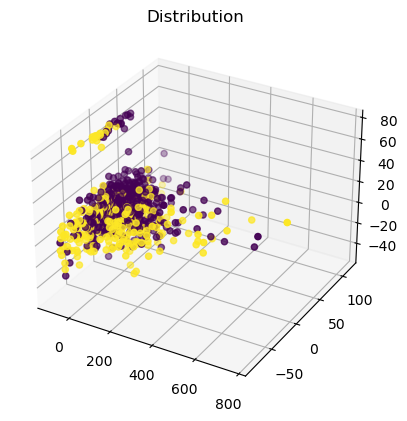

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
results=pca.fit(data)
data_projected = results.transform(data)
                                ###Principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, the right singular vectors of the centered input data, parallel to its eigenvectors. The components are sorted by decreasing explained_variance_.
print(data_projected)

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()
ax = plt.axes(projection ='3d')
x=data_projected[:,0]
y=data_projected[:,1]
z=data_projected[:,2]
labels = Y
ax.scatter(x, y, z,c=labels)
ax.set_title('Distribution')
plt.show()


# eigenvalues = results.explained_variance_ ##### eigenvalues
# print(np.round(eigenvalues,5))

# ratio = results.explained_variance_ratio_  ##### % of features
# print(np.round(ratio,5))

# Y_new = results.transform(Y)   ### transformed new 
# print(Y_new)



In [3]:
X_train, X_rem, y_train, y_rem = train_test_split(X, Y, test_size=0.2,shuffle =False)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5,shuffle =False)

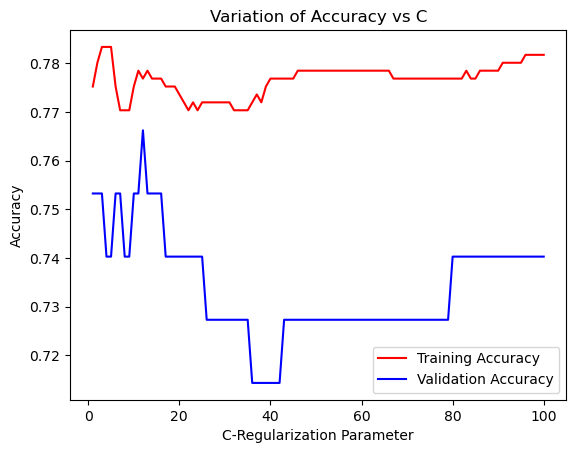

In [10]:
from sklearn.svm import SVC
accu_train = []
accu_val = []
for c in range (100):
    model = SVC(kernel = 'poly', degree = 2, C = c+1)
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    accu_train.append(accuracy_score(y_train,pred_train))
    accu_val.append(accuracy_score(y_val,pred_val))
lst = list(range(1,101))
plt.plot(lst,accu_train,"red")
plt.plot(lst,accu_val,"blue")
plt.legend(["Training Accuracy", "Validation Accuracy"], loc ="lower right")
plt.xlabel("C-Regularization Parameter")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy vs C")
plt.show()


In [ ]:
from sklearn.svm import SVC
accu_train = []
accu_val = []
for c in range (100):
    model = SVC(kernel = 'linear', C = c+1)
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    accu_train.append(accuracy_score(y_train,pred_train))
    accu_val.append(accuracy_score(y_val,pred_val))
lst = list(range(1,101))
plt.plot(lst,accu_train,"red")
plt.plot(lst,accu_val,"blue")
plt.legend(["Training Accuracy", "Validation Accuracy"], loc ="lower right")
plt.xlabel("C-Regularization Parameter")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy vs C")
plt.show()

In [ ]:
from sklearn.svm import SVC
accu_train = []
accu_val = []
for c in range (100):
    model = SVC(kernel = 'rbfn', C = c+1)
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    accu_train.append(accuracy_score(y_train,pred_train))
    accu_val.append(accuracy_score(y_val,pred_val))
lst = list(range(1,101))
plt.plot(lst,accu_train,"red")
plt.plot(lst,accu_val,"blue")
plt.legend(["Training Accuracy", "Validation Accuracy"], loc ="lower right")
plt.xlabel("C-Regularization Parameter")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy vs C")
plt.show()

In [ ]:
?SVC

0.7752442996742671
0.7662337662337663
[[44 16]
 [ 2 15]]
0.4838709677419355
0.8823529411764706
0.625
0.7201963534361852


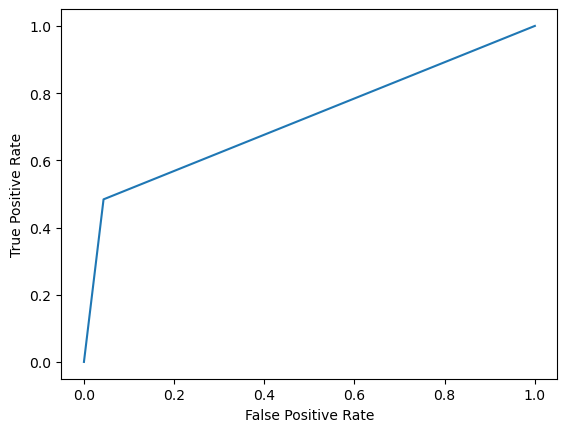

In [13]:
model = SVC(kernel = 'poly', degree = 2, C =1)
model.fit(X_train,y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print(accuracy_score(pred_train,y_train))
print(accuracy_score(pred_test , y_test))

print(confusion_matrix(pred_test ,y_test))

precision = precision_score(pred_test ,y_test)
print(precision_score(pred_test ,y_test))

recall = recall_score(pred_test ,y_test)
print(recall_score(pred_test ,y_test))

print(f1_score(pred_test ,y_test))

def plot_roc_curve(y_test, pred_test):
    fpr, tpr, thresholds = roc_curve(y_test, pred_test)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(y_test, pred_test)
print(roc_auc_score(y_test, pred_test))

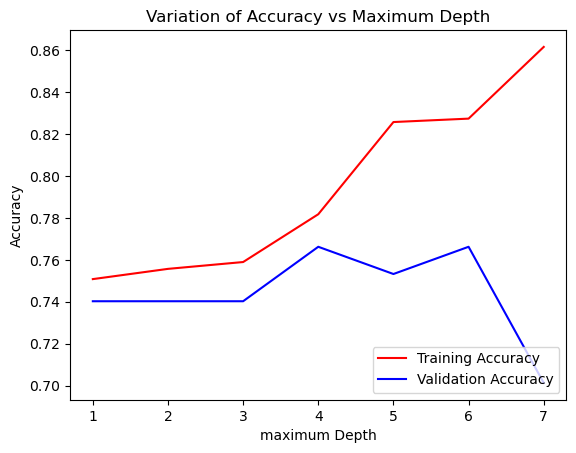

In [20]:

from sklearn.tree import DecisionTreeClassifier


accu_train = []
accu_val = []
for d in range (7):
    model = dtree=DecisionTreeClassifier(max_depth = d+1)
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    accu_train.append(accuracy_score(y_train,pred_train))
    accu_val.append(accuracy_score(y_val,pred_val))
lst = list(range(1,8))
plt.plot(lst,accu_train,"red")
plt.plot(lst,accu_val,"blue")
plt.legend(["Training Accuracy", "Validation Accuracy"], loc ="lower right")
plt.xlabel("maximum Depth")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy vs Maximum Depth")
plt.show()



0.7817589576547231
0.7532467532467533
[[33  6]
 [13 25]]
0.8064516129032258
0.6578947368421053
0.7246376811594202
0.761921458625526


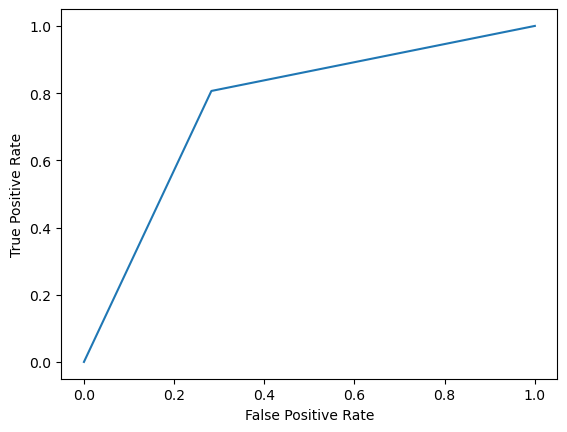

In [36]:
model =DecisionTreeClassifier(max_depth = 4)
model.fit(X_train,y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print(accuracy_score(pred_train,y_train))
print(accuracy_score(pred_test , y_test))

print(confusion_matrix(pred_test ,y_test))

precision = precision_score(pred_test ,y_test)
print(precision_score(pred_test ,y_test))

recall = recall_score(pred_test ,y_test)
print(recall_score(pred_test ,y_test))

print(f1_score(pred_test ,y_test))

def plot_roc_curve(y_test, pred_test):
    fpr, tpr, thresholds = roc_curve(y_test, pred_test)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(y_test, pred_test)
print(roc_auc_score(y_test, pred_test))

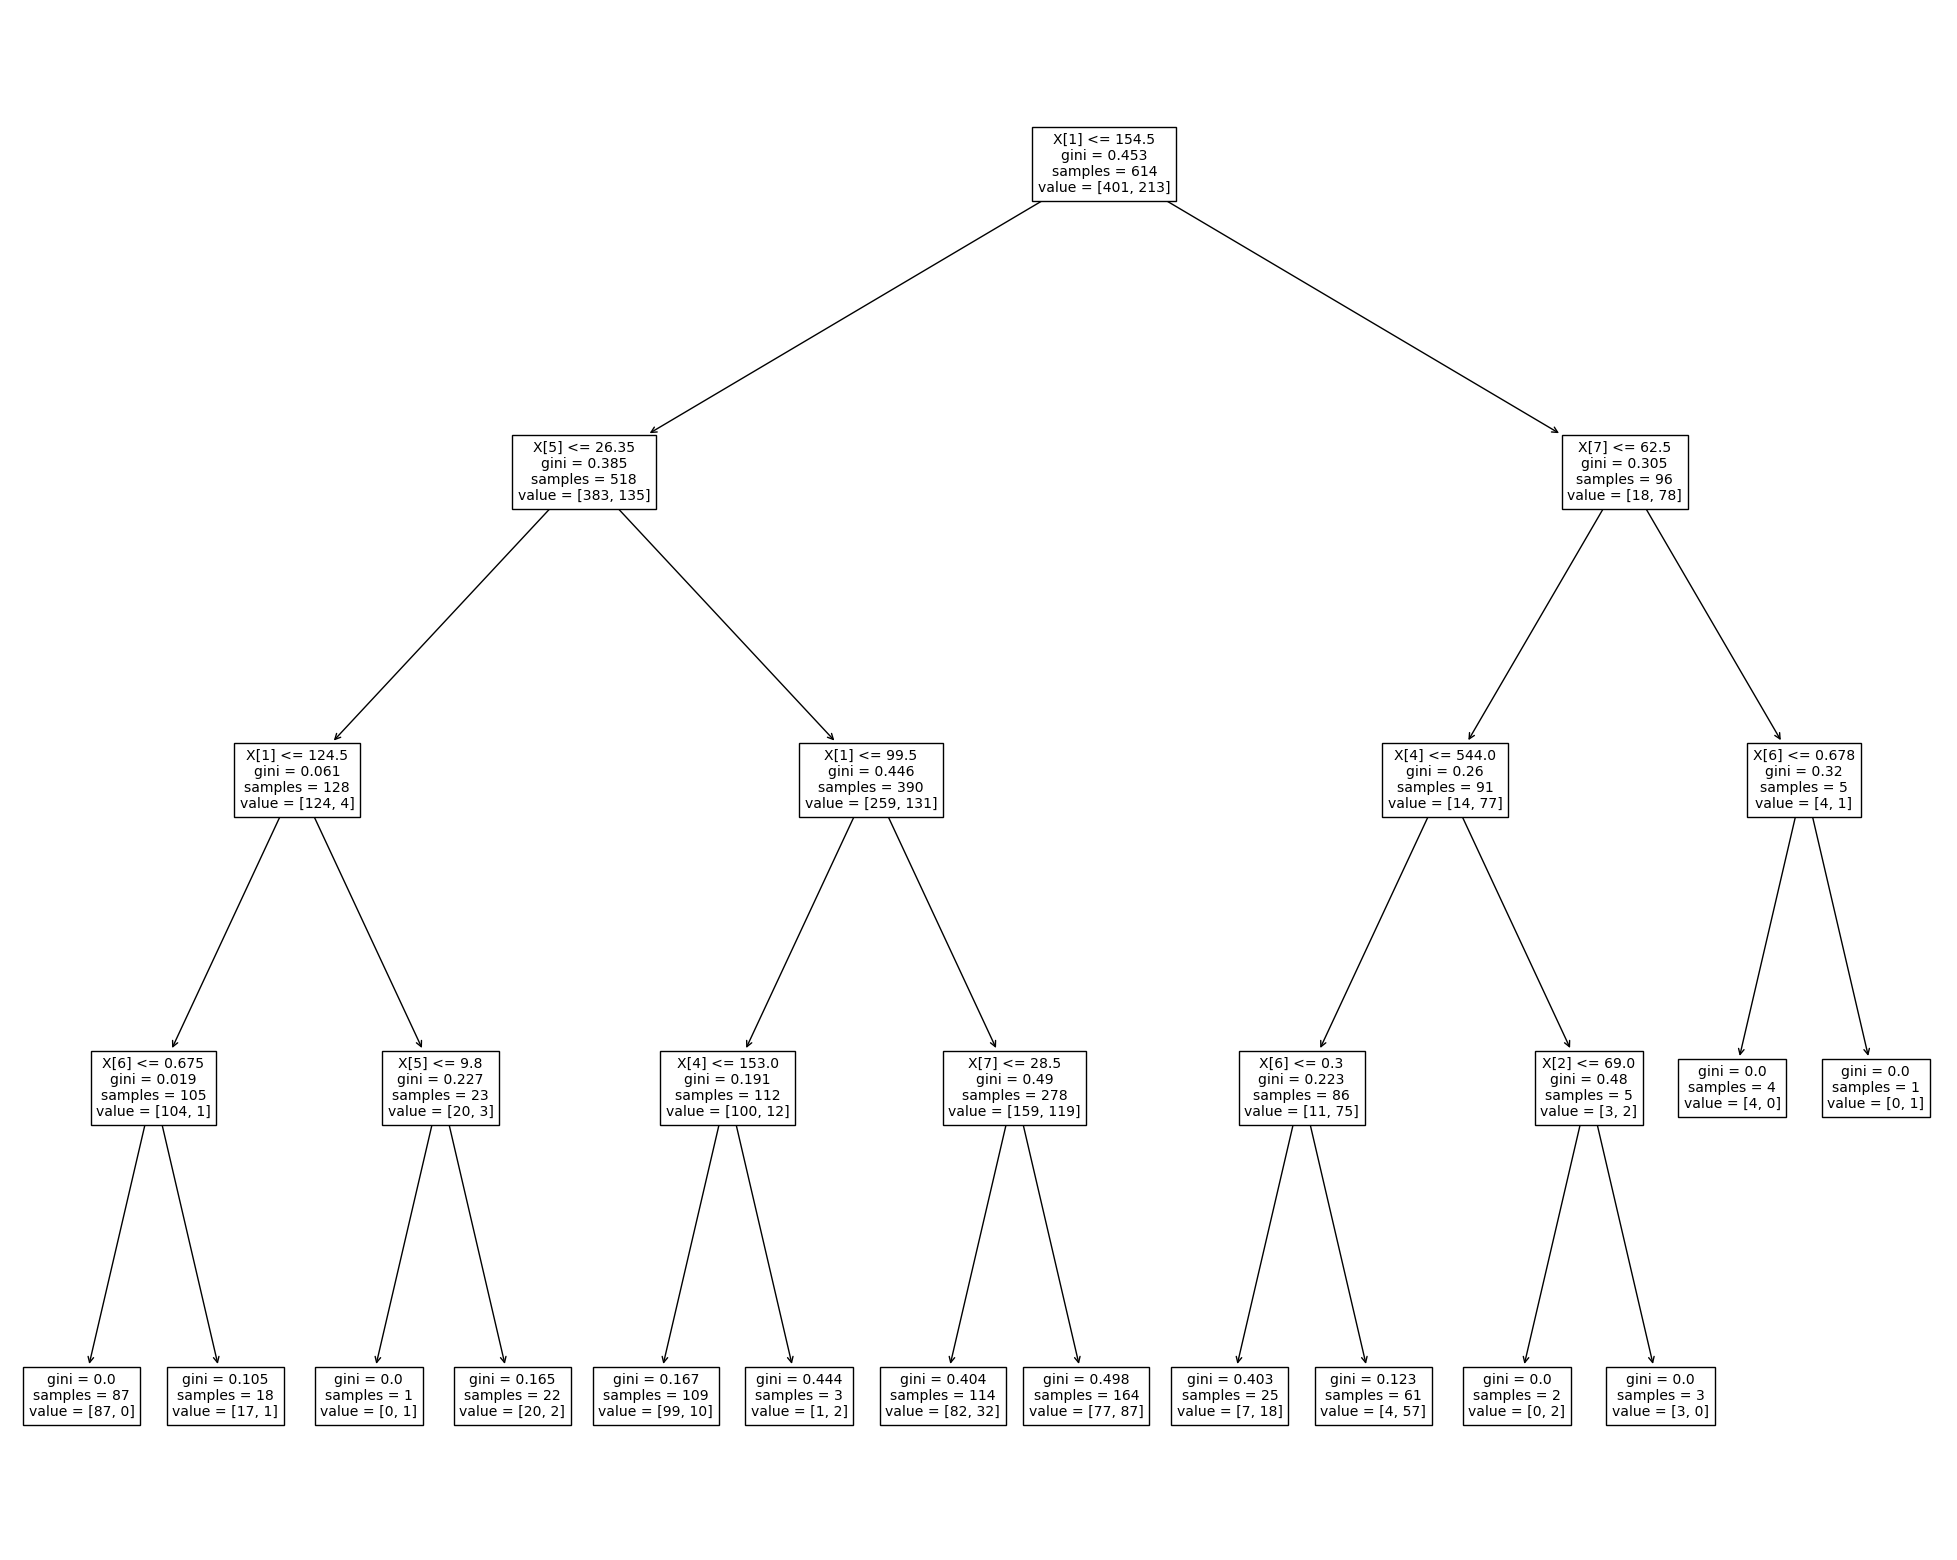

In [51]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model)

In [39]:
#!pip install graphviz


In [49]:
# import os
# os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz\bin'

In [43]:
# ?pd.read_csv

In [50]:
# import graphviz 
# dot_data = tree.export_graphviz(model, out_file=None,filled=True, rounded=True, special_characters=True)
# graph = graphviz.Source(dot_data) 
# graph.render("data") 
# graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

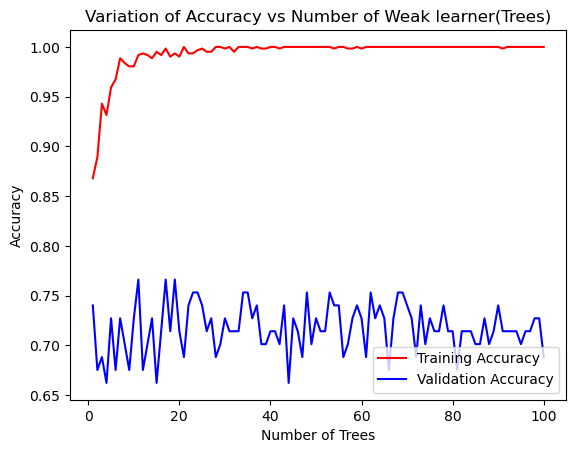

In [25]:
from sklearn.ensemble import RandomForestClassifier
accu_train = []
accu_val = []
for d in range (100):
    model= RandomForestClassifier(n_estimators = d+1)
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    accu_train.append(accuracy_score(y_train,pred_train))
    accu_val.append(accuracy_score(y_val,pred_val))
lst = list(range(1,101))
plt.plot(lst,accu_train,"red")
plt.plot(lst,accu_val,"blue")
plt.legend(["Training Accuracy", "Validation Accuracy"], loc ="lower right")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy vs Number of Weak learner(Trees)")
plt.show()


1.0
0.7922077922077922
[[41 11]
 [ 5 20]]
0.6451612903225806
0.8
0.7142857142857142
0.7682328190743337


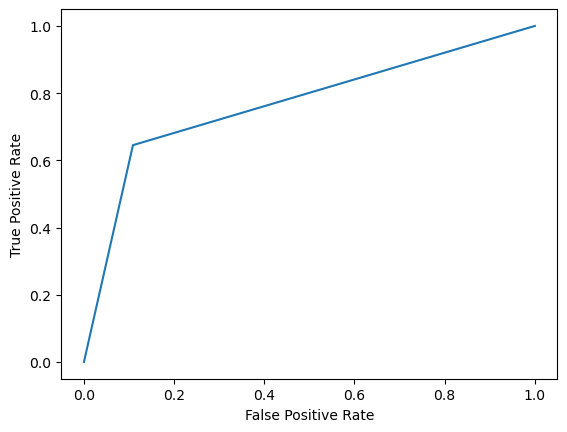

In [27]:
model =RandomForestClassifier(n_estimators = 68)
model.fit(X_train,y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print(accuracy_score(pred_train,y_train))
print(accuracy_score(pred_test , y_test))

print(confusion_matrix(pred_test ,y_test))

precision = precision_score(pred_test ,y_test)
print(precision_score(pred_test ,y_test))

recall = recall_score(pred_test ,y_test)
print(recall_score(pred_test ,y_test))

print(f1_score(pred_test ,y_test))

def plot_roc_curve(y_test, pred_test):
    fpr, tpr, thresholds = roc_curve(y_test, pred_test)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(y_test, pred_test)
print(roc_auc_score(y_test, pred_test))

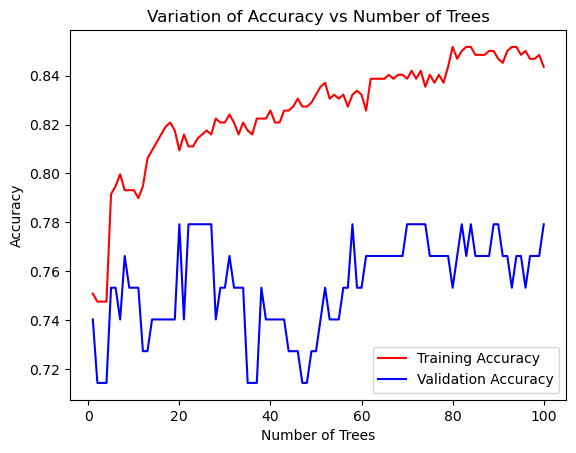

In [22]:
from sklearn.ensemble import AdaBoostClassifier
accu_train = []
accu_val = []
for d in range (100):
    model= AdaBoostClassifier(n_estimators = d+1)
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    accu_train.append(accuracy_score(y_train,pred_train))
    accu_val.append(accuracy_score(y_val,pred_val))
lst = list(range(1,101))
plt.plot(lst,accu_train,"red")
plt.plot(lst,accu_val,"blue")
plt.legend(["Training Accuracy", "Validation Accuracy"], loc ="lower right")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy vs Number of Trees")
plt.show()


0.8469055374592834
0.7662337662337663
[[40 12]
 [ 6 19]]
0.6129032258064516
0.76
0.6785714285714285
0.741234221598878


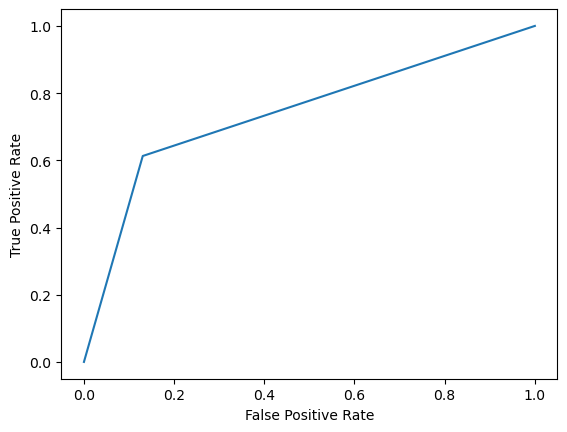

In [24]:
model =AdaBoostClassifier(n_estimators = 90)
model.fit(X_train,y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print(accuracy_score(pred_train,y_train))
print(accuracy_score(pred_test , y_test))

print(confusion_matrix(pred_test ,y_test))

precision = precision_score(pred_test ,y_test)
print(precision_score(pred_test ,y_test))

recall = recall_score(pred_test ,y_test)
print(recall_score(pred_test ,y_test))

print(f1_score(pred_test ,y_test))

def plot_roc_curve(y_test, pred_test):
    fpr, tpr, thresholds = roc_curve(y_test, pred_test)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(y_test, pred_test)
print(roc_auc_score(y_test, pred_test))